In [1]:
import cv2
import numpy as np
import random as rng
from matplotlib import pyplot as plt
import text_recognition

In [66]:
color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))

In [76]:
filename = 'images/pan_card_9.jpeg'

In [77]:
img = cv2.imread(filename)
img = crop_card(img)

In [78]:
tmp = cv2.imread('images/templates/logo.jpeg')

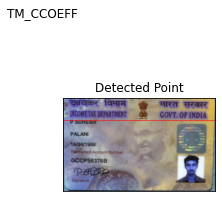

In [79]:
img2 = img.copy()
if tmp.shape[1] > img.shape[1]:
    ratio = img.shape[1]/tmp.shape[1]
    tmp = cv2.resize(tmp, (0,0), fx=ratio, fy=ratio) 
c, w, h = tmp.shape[::-1]

# All the 6 methods for comparison in a list
img = img2.copy()
# Apply template Matching
res = cv2.matchTemplate(img,tmp,cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img,top_left, bottom_right, 255, 2)

plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle('TM_CCOEFF')

plt.show()

(0, 0) (831, 128)


(Text(0.5, 1.0, 'Detected Point'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

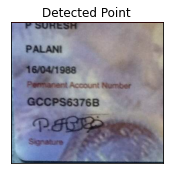

In [80]:
## Crop Image
print(top_left, bottom_right)
l = int(bottom_right[0]/2)
y = bottom_right[1]
nimg = img[y:,0:l]
plt.subplot(122),plt.imshow(nimg,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])


(<matplotlib.axes._subplots.AxesSubplot at 0x7ff7402a8580>,
 <matplotlib.image.AxesImage at 0x7ff7401ded90>)

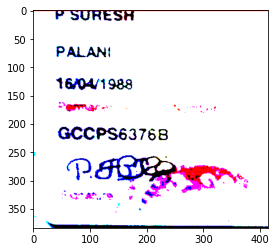

In [81]:
#Apply Thresholding
_, tH = cv2.threshold(nimg, 80, 255, cv2.THRESH_BINARY)
# gray = cv2.cvtColor(tH, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray, (5, 5), 0)
# edged = cv2.Canny(gray, 5, 200)
plt.subplot(111),plt.imshow(tH)

In [82]:
#Apply Bilateral Filter
# img = cv2.bilateralFilter(gray,10,85,85)
# plt.subplot(111),plt.imshow(img)

In [83]:
#Apply Dilation
# kernel = np.ones((1,1), np.uint8)
# dilation = cv2.dilate(img, kernel)
# plt.subplot(111),plt.imshow(dilation)

In [84]:
text_recognition.imgToTxt(image = tH)

[INFO] loading EAST text detector...
8
OCR TEXT
FP SUHESA

OCR TEXT
PALAN!

OCR TEXT
1988

OCR TEXT
16/04/1982

OCR TEXT
Sermare:  -

OCR TEXT
GCCPS63768

OCR TEXT
PFD

OCR TEXT
Ss ue a“



In [14]:
def crop_card(image):
    # Find countour by color range
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([36,22,22])
    upper_blue = np.array([180,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange (hsv, lower_blue, upper_blue)
    bluecnts = cv2.findContours(mask.copy(),
                              cv2.RETR_EXTERNAL,
                              cv2.CHAIN_APPROX_SIMPLE)[-2]

    if len(bluecnts)>0:
        blue_area = max(bluecnts, key=cv2.contourArea)
        (xg,yg,wg,hg) = cv2.boundingRect(blue_area)
        image = image[yg:yg+hg, xg:xg+wg]
    return image